In [1]:
pip install Pyarrow statsmodels scikit-learn 


  Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 39.6 MB/s eta 0:00:00:00:0100:01
Using cached statsmodels-0.14.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 29.5 MB/s eta 0:00:00
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 35.2 MB/s eta 0:00:00:00:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
df = pd.read_csv("fifa22.csv")
df.head()

,name,rank,gender,wage_eur,log_wage,position,nationality,club,league,preferred_foot,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,Lionel Andrés Messi Cuccittini,93,M,320000.0,12.676076,RW,Argentina,Paris Saint-Germain,French Ligue 1,Left,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,Lucia Roberta Tough Bronze,92,F,NaN,NaN,NaN,England,NaN,NaN,Right,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,Vivianne Miedema,92,F,NaN,NaN,NaN,Netherlands,NaN,NaN,Right,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,Wéndèleine Thérèse Renard,92,F,NaN,NaN,NaN,France,NaN,NaN,Right,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,Robert Lewandowski,92,M,270000.0,12.506177,ST,Poland,FC Bayern München,German 1. Bundesliga,Right,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


In [3]:
male = df['gender'] == 'M'
countMale = male.sum()
print("This is the count for male:", countMale)
female = df['gender'] == 'F'
countFemale = female.sum()
print("This is the count for female:", countFemale)

This is the count for male: 19239
This is the count for female: 391


In [4]:
df = df.dropna(subset=['passing'])
df

,name,rank,gender,wage_eur,log_wage,position,nationality,club,league,preferred_foot,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,Lionel Andrés Messi Cuccittini,93,M,320000.0,12.676076,RW,Argentina,Paris Saint-Germain,French Ligue 1,Left,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,Lucia Roberta Tough Bronze,92,F,NaN,NaN,NaN,England,NaN,NaN,Right,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,Vivianne Miedema,92,F,NaN,NaN,NaN,Netherlands,NaN,NaN,Right,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,Wéndèleine Thérèse Renard,92,F,NaN,NaN,NaN,France,NaN,NaN,Right,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,Robert Lewandowski,92,M,270000.0,12.506177,ST,Poland,FC Bayern München,German 1. Bundesliga,Right,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19624,Caoimhin Porter,47,M,500.0,6.214608,RES,Republic of Ireland,Derry City,Rep. Ireland Airtricity League,Right,39.0,50.0,46.0,42.666667,43.2,43.4,60.0,48.8,46.500000,9.4
19625,Nathan Logue-Cunningham,47,M,500.0,6.214608,RES,Republic of Ireland,Finn Harps,Rep. Ireland Airtricity League,Right,37.0,45.0,49.0,43.333333,40.0,43.8,56.6,49.4,42.500000,7.4
19626,Luke Rudden,47,M,500.0,6.214608,RES,Republic of Ireland,Finn Harps,Rep. Ireland Airtricity League,Right,46.0,36.0,48.0,11.666667,38.0,38.0,65.8,45.8,38.500000,10.6
19627,Emanuel Lalchhanchhuaha,47,M,500.0,6.214608,SUB,India,NorthEast United FC,Indian Super League,Right,38.0,45.0,48.0,33.666667,40.8,41.0,68.2,49.0,43.500000,11.4


In [5]:
results = smf.ols('rank ~ passing + attacking + defending + skill', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:40:14   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.3278      0.203    124.785      0.0

In [6]:
Y = df[["rank"]]
X = df[["passing", "attacking", "defending", "skill"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2023)
X_test

,passing,attacking,defending,skill
12646,64.0,59.0,59.000000,64.4
16709,56.0,48.2,50.000000,50.6
14680,56.0,49.6,62.333333,56.2
9706,61.0,53.2,63.000000,55.6
4757,72.0,64.6,64.333333,71.0
...,...,...,...,...
15824,55.0,43.8,59.000000,51.6
3369,58.0,65.2,20.333333,61.8
3654,72.0,71.6,38.000000,74.2
19483,49.0,43.4,43.333333,45.8


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'predicted value vs Residuals')

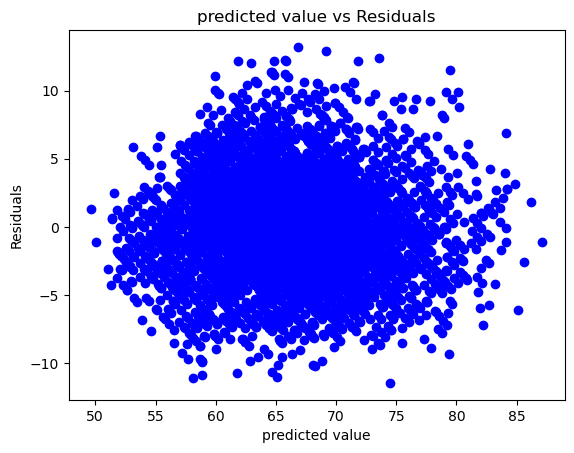

In [8]:
y_pred = lr.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel("predicted value") 
plt.ylabel("Residuals")
plt.title("predicted value vs Residuals")

In [9]:
confidence_interval = results.conf_int(alpha=0.05).loc['skill']
print("This is the confidence interval:", confidence_interval)

This is the confidence interval: 0   -0.011086
1    0.024249
Name: skill, dtype: float64


In [10]:
X = df[['passing', 'attacking', 'defending','skill']]
print(X.head())
Y = df[['rank']]
print(Y.head())

   passing  attacking  defending  skill
0     91.0       85.8  26.333333   94.0
1     70.0       69.0  89.000000   62.2
2     75.0       86.0  25.000000   79.0
3     62.0       62.6  91.333333   67.8
4     79.0       86.0  32.000000   81.4
   rank
0    93
1    92
2    92
3    92
4    92


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)
X_train.head()

,passing,attacking,defending,skill
17226,52.0,48.0,59.333333,53.2
13548,48.0,55.0,12.666667,54.0
17874,59.0,46.2,58.000000,57.8
19599,47.0,40.6,46.666667,40.0
15629,49.0,51.8,25.666667,49.6


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: [25.16773306]
Coefficients: [[-0.02444506  0.61230756  0.17314968  0.00612364]]


In [14]:
y_pred = lr.predict(X_test)
print("First three predicted rank values:", y_pred[:3])

First three predicted rank values: [[64.57617047]
 [72.78035994]
 [70.46341746]]


Text(0.5, 1.0, 'Actual vs. Predicted Rank Values')

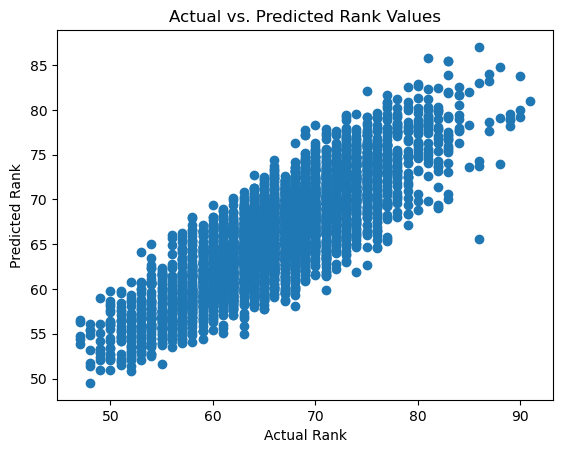

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rank") 
plt.ylabel("Predicted Rank")
plt.title("Actual vs. Predicted Rank Values")

In [17]:
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_pred):.3f}")
print("An RMSE of 3.745 means that, on average, the model's predictions deviate from the actual values by approximately 3.745 rank points.")

RMSE: 3.745
An RMSE of 3.745 means that, on average, the model's predictions deviate from the actual values by approximately 3.745 rank points.


In [19]:

pip install scikit-learn seaborn Pyarrow

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [21]:
preferredFoot = df[["preferred_foot"]]

numberOfLeft = preferredFoot == "Left"
totalLeft = numberOfLeft.sum()
print("Lefties", totalLeft)
numberOfRight = preferredFoot == "Right"
totalRight = numberOfRight.sum()
print("Righties", totalRight)

Lefties preferred_foot    4406
dtype: int64
Righties preferred_foot    13044
dtype: int64


In [22]:
X = df[['shooting', 'passing', 'dribbling', 'defending', 'attacking', 'skill', 'movement', 'power', 'mentality','goalkeeping']]
X.head()


,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


In [23]:
scaler = StandardScaler()

X_normalized = scaler.fit(X).transform(X)
X_new_dataframe = pd.DataFrame(X_normalized, columns=X.columns)
X_new_dataframe.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,2.784312,3.296642,3.315358,-1.393049,3.400164,3.548580,2.774640,1.944282,2.180614,0.281676
1,0.597719,1.229719,1.876719,2.131667,1.593417,0.598209,2.072809,2.066501,1.623697,1.481100
2,2.854847,1.721843,2.596039,-1.468043,3.421673,2.156896,1.651710,2.702042,1.822596,3.480141
3,1.232536,0.442320,1.054640,2.262906,0.905132,1.117771,-0.290023,2.506491,2.140834,1.614369
4,2.784312,2.115543,2.390519,-1.074325,3.421673,2.379565,1.768682,2.799817,2.996099,-0.118132


In [24]:
X = df[['shooting', 'passing', 'dribbling', 'defending', 'attacking', 'skill', 'movement', 'power', 'mentality','goalkeeping']]
Y = df[['preferred_foot']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=456)
X_train.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
17219,24.0,43.0,48.0,59.000000,37.2,38.8,58.2,53.6,42.500000,11.2
10931,46.0,61.0,70.0,58.666667,51.6,62.4,72.4,56.6,53.000000,10.0
13667,57.0,59.0,64.0,35.333333,55.0,55.8,66.0,58.6,52.500000,7.6
4492,76.0,78.0,72.0,46.000000,65.4,78.0,71.2,66.8,62.166667,12.8
3980,26.0,60.0,63.0,71.333333,48.8,53.8,62.6,55.8,59.333333,10.8


In [25]:
X_train

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
17219,24.0,43.0,48.0,59.000000,37.2,38.8,58.2,53.6,42.500000,11.2
10931,46.0,61.0,70.0,58.666667,51.6,62.4,72.4,56.6,53.000000,10.0
13667,57.0,59.0,64.0,35.333333,55.0,55.8,66.0,58.6,52.500000,7.6
4492,76.0,78.0,72.0,46.000000,65.4,78.0,71.2,66.8,62.166667,12.8
3980,26.0,60.0,63.0,71.333333,48.8,53.8,62.6,55.8,59.333333,10.8
...,...,...,...,...,...,...,...,...,...,...
13849,29.0,42.0,39.0,60.333333,39.4,35.6,37.6,53.4,44.666667,10.8
13382,51.0,59.0,69.0,45.333333,55.6,59.4,66.4,62.4,54.000000,11.4
11858,63.0,53.0,61.0,61.000000,58.0,49.0,58.8,68.2,61.166667,9.6
17900,46.0,55.0,57.0,53.666667,46.8,51.2,59.8,53.8,52.000000,11.6


In [26]:
y_train

,preferred_foot
17219,Right
10931,Left
13667,Right
4492,Left
3980,Left
...,...
13849,Right
13382,Right
11858,Right
17900,Right


In [28]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred[:3]

/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['Right', 'Right', 'Right'], dtype=object)

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 194, 1132],
       [ 287, 3622]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Left       0.40      0.15      0.21      1326
       Right       0.76      0.93      0.84      3909

    accuracy                           0.73      5235
   macro avg       0.58      0.54      0.53      5235
weighted avg       0.67      0.73      0.68      5235

